In [1]:
import pandas as pd
from common import data_folder_path
import matplotlib.pyplot as plt
import os

In [3]:
data_file = 'train.csv'
df = pd.read_csv(os.path.join(data_folder_path,data_file))
df['datetime'] = pd.to_datetime(df['datetime'])
df['Month']=df['datetime'].dt.month
df['Year']=df['datetime'].dt.year

<Axes: title={'center': 'Energy Consumption Trend over Time'}, xlabel='Year,Month'>

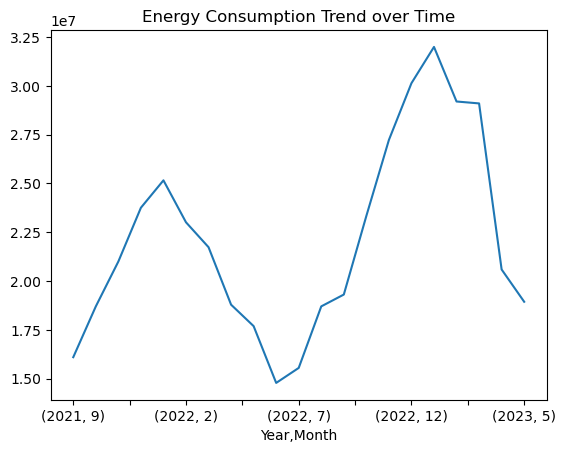

In [9]:
df[df['is_consumption']==1].groupby(['Year','Month'])['target'].sum().plot(title='Energy Consumption Trend over Time')

<Axes: title={'center': 'Energy Production Trend over Time'}, xlabel='Year,Month'>

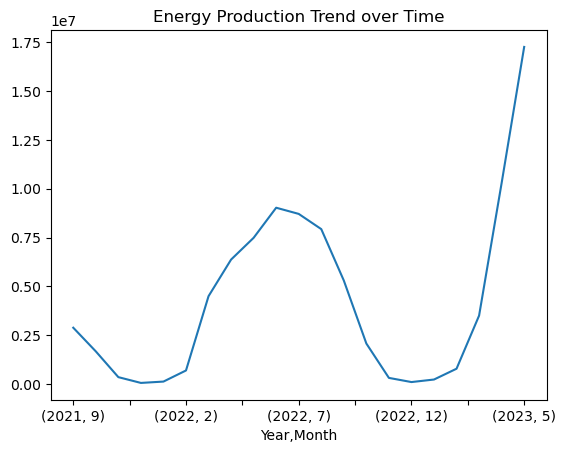

In [10]:
df[df['is_consumption']==0].groupby(['Year','Month'])['target'].sum().plot(title='Energy Production Trend over Time')

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
model = seasonal_decompose(df[df['is_consumption']==0].groupby(['Year','Month'])['target'].sum(),model='additive',period=2)

<Axes: title={'center': 'Energy Production Trend over Time'}, xlabel='Year,Month'>

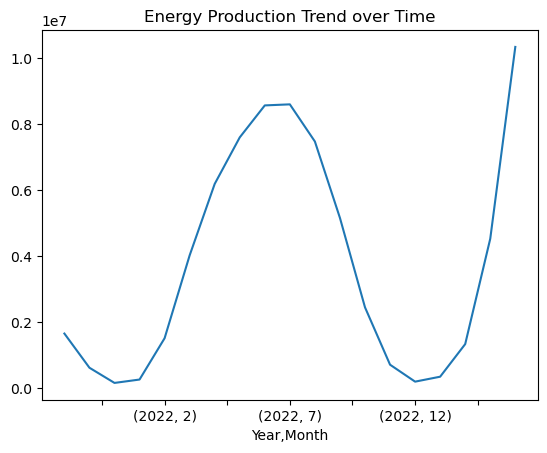

In [47]:
model._trend.plot(title='Energy Production Trend over Time')

In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 target   No. Observations:                   21
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -342.241
Date:                Thu, 18 Jan 2024   AIC                            688.483
Time:                        21:36:00   BIC                            690.572
Sample:                             0   HQIC                           688.936
                                 - 21                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9646      0.056     17.073      0.000       0.854       1.075
sigma2      6.928e+12   1.37e-15   5.08e+27      0.000    6.93e+12    6.93e+12
===================================================================================
Ljung-Box (L1) (Q):                  10.47   Jarque-Bera (JB):                 5.05
Prob(Q):                              0.00   Prob(JB):                         0.08
Heteroskedasticity (H):               6.08   Skew:                             1.11
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""